
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BigDataWUR/AgML-CY-Bench/blob/main/notebooks/cybench_summary.ipynb)

# CY-Bench dataset summary

Based on a notebook contributed by Ioannis N. Athanasiadis.

## Install packages

In [ ]:
%pip install --quiet plottable pycountry

## Load dataset summary

This dataset summary is produced by running the `cybench/runs/benchmark_summary.py`.

In [ ]:
import os
import pandas as pd
import pycountry

path_to_csv = "/path/to/csv"
summary_df = pd.read_csv(os.path.join(path_to_csv, "dataset_summary.csv"))
summary_df["country_code"] = summary_df["Dataset"].str[-2:]
summary_df["Labels Count Per Year"] = summary_df["Labels Count Per Year"].apply(lambda x: [int(p) for p in x.split(" ")])

countries = summary_df["country_code"].unique()

summary_per_country = {}
for cn in countries:
  for crop in ["maize", "wheat"]:
    cn_crop_df = summary_df[summary_df["Dataset"] == crop + "_" + cn]
    years, adm_id_count, labels_count, labels_count_per_year = None, None, None, None
    if (not cn_crop_df.empty):
      years = cn_crop_df["Min Year-Max Year"].values[0]
      adm_id_count = cn_crop_df["Admin Regions Count"].values[0]
      labels_count = cn_crop_df["Labels Count"].values[0]
      labels_count_per_year = cn_crop_df["Labels Count Per Year"].values[0]

    cn_summary = []
    if (cn in summary_per_country):
      cn_summary = summary_per_country[cn]

    cn_summary += [years, adm_id_count, labels_count, labels_count_per_year]
    if (cn == "EL"):
      summary_per_country["GR"] = cn_summary
    else:
      summary_per_country[cn] = cn_summary

summary_cols = ["maize_years", "maize_adm_id_count",
                "maize_labels_count", "maize_labels_count_per_year",
                "wheat_years", "wheat_adm_id_count",
                "wheat_labels_count", "wheat_labels_count_per_year"]
summary_df = pd.DataFrame.from_dict(summary_per_country, columns=summary_cols, orient="index")

ASIA_COUNTRIES = ["CN", "IN"]
FEWSNET_COUNTRIES = ["AO", "BF", "ET", "LS", "MG", "MW", "MZ", "NE", "SN", "TD", "ZA", "ZM"]
EU_COUNTRIES = ["AT", "BE", "BG", "CZ", "DE", "DK", "GR", "ES", "FR", "HR", "HU",
                "IT", "LT", "NL", "PL", "PT",  "RO", "SE", "SK"]
NORTH_AMERICA_COUNTRIES = ["MX", "US"]
SOUTH_AMERICA_COUNTRIES = ["AR", "BR"]

custom_order = ["AU"] + ASIA_COUNTRIES + FEWSNET_COUNTRIES + EU_COUNTRIES
custom_order += NORTH_AMERICA_COUNTRIES + SOUTH_AMERICA_COUNTRIES

summary_df = summary_df.reindex(index=custom_order)
summary_df.reset_index(inplace=True)
summary_df.rename(columns={"index": "country_code"}, inplace=True)
summary_df["Country"] = summary_df["country_code"].apply(lambda x: pycountry.countries.get(alpha_2=x).name)
summary_df.set_index("Country", inplace=True)

for c in summary_cols:
  if (c.endswith("years")):
    summary_df[c] = summary_df[c].fillna("No Data")

  if (c.endswith("count")):
    summary_df[c] = summary_df[c].fillna(0)

In [5]:
summary_df

,country_code,maize_years,maize_adm_id_count,maize_labels_count,maize_labels_count_per_year,wheat_years,wheat_adm_id_count,wheat_labels_count,wheat_labels_count_per_year
Country,,,,,,,,,
Australia,AU,No Data,0.0,0.0,None,2003-2022,17.0,270.0,"[13, 13, 10, 13, 13, 14, 12, 17, 11, 11, 16, 1..."
China,CN,2003-2022,31.0,595.0,"[15, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3...",2004-2022,25.0,475.0,"[0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25..."
India,IN,2003-2017,498.0,6498.0,"[147, 425, 425, 429, 438, 447, 446, 446, 456, ...",2004-2017,474.0,6261.0,"[0, 427, 430, 433, 434, 449, 443, 446, 455, 45..."
Angola,AO,2004-2017,17.0,238.0,"[0, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17...",No Data,0.0,0.0,None
Burkina Faso,BF,2003-2019,45.0,540.0,"[44, 44, 45, 45, 45, 45, 45, 45, 45, 44, 45, 4...",No Data,0.0,0.0,None
Ethiopia,ET,2003-2020,60.0,722.0,"[26, 0, 55, 55, 60, 60, 58, 60, 2, 56, 59, 60,...",No Data,0.0,0.0,None
Lesotho,LS,2004-2021,10.0,163.0,"[0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...",No Data,0.0,0.0,None
Madagascar,MG,2005-2010,22.0,132.0,"[0, 0, 22, 22, 22, 22, 22, 22, 0, 0, 0, 0, 0, ...",No Data,0.0,0.0,None
Malawi,MW,2018-2023,4.0,16.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",No Data,0.0,0.0,None


## Plot summaries

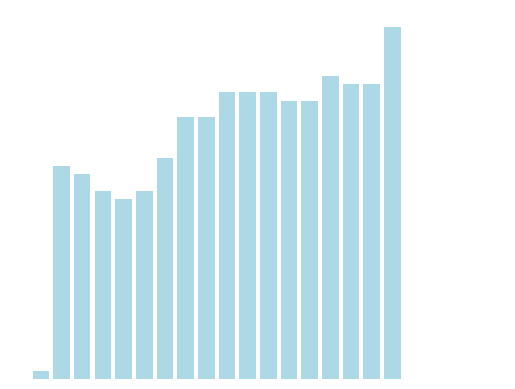

In [6]:
import matplotlib.pyplot as plt
import matplotlib.axes
import typing

def densities_plot(ax: matplotlib.axes.Axes, val: typing.Any, hideAxes=True, startx=2003) -> typing.Optional[matplotlib.container.BarContainer]:
    """
    Plots a density bar chart on the given axes. Handles cases where `val` is None or empty.

    Parameters:
    - ax: The matplotlib axes on which to plot.
    - val: The data values to plot. If None or empty, no plot is created.
    - hideAxes: If True, hides the axes.
    - startx: The starting x-value for the bars.

    Returns:
    - The BarContainer if data is plotted, None if `val` is None or empty.
    """
    if val is None or len(val) == 0:
        # If `val` is None or empty, display a placeholder message
        ax.text(
            0.5, 0.5, "No Data",
            fontsize=24,
            ha="center", va="center",
            transform=ax.transAxes
        )
        if hideAxes:
            ax.set_axis_off()
        return None

    # Proceed with plotting the bar chart
    bar = ax.bar(
        range(startx, startx + len(val)),
        val,
        color="lightblue"
    )
    if hideAxes:
        ax.set_axis_off()

    return bar

# Test the above
ax = plt.axes()
bar = densities_plot(ax, summary_df["wheat_labels_count_per_year"]["Spain"])
plt.show()

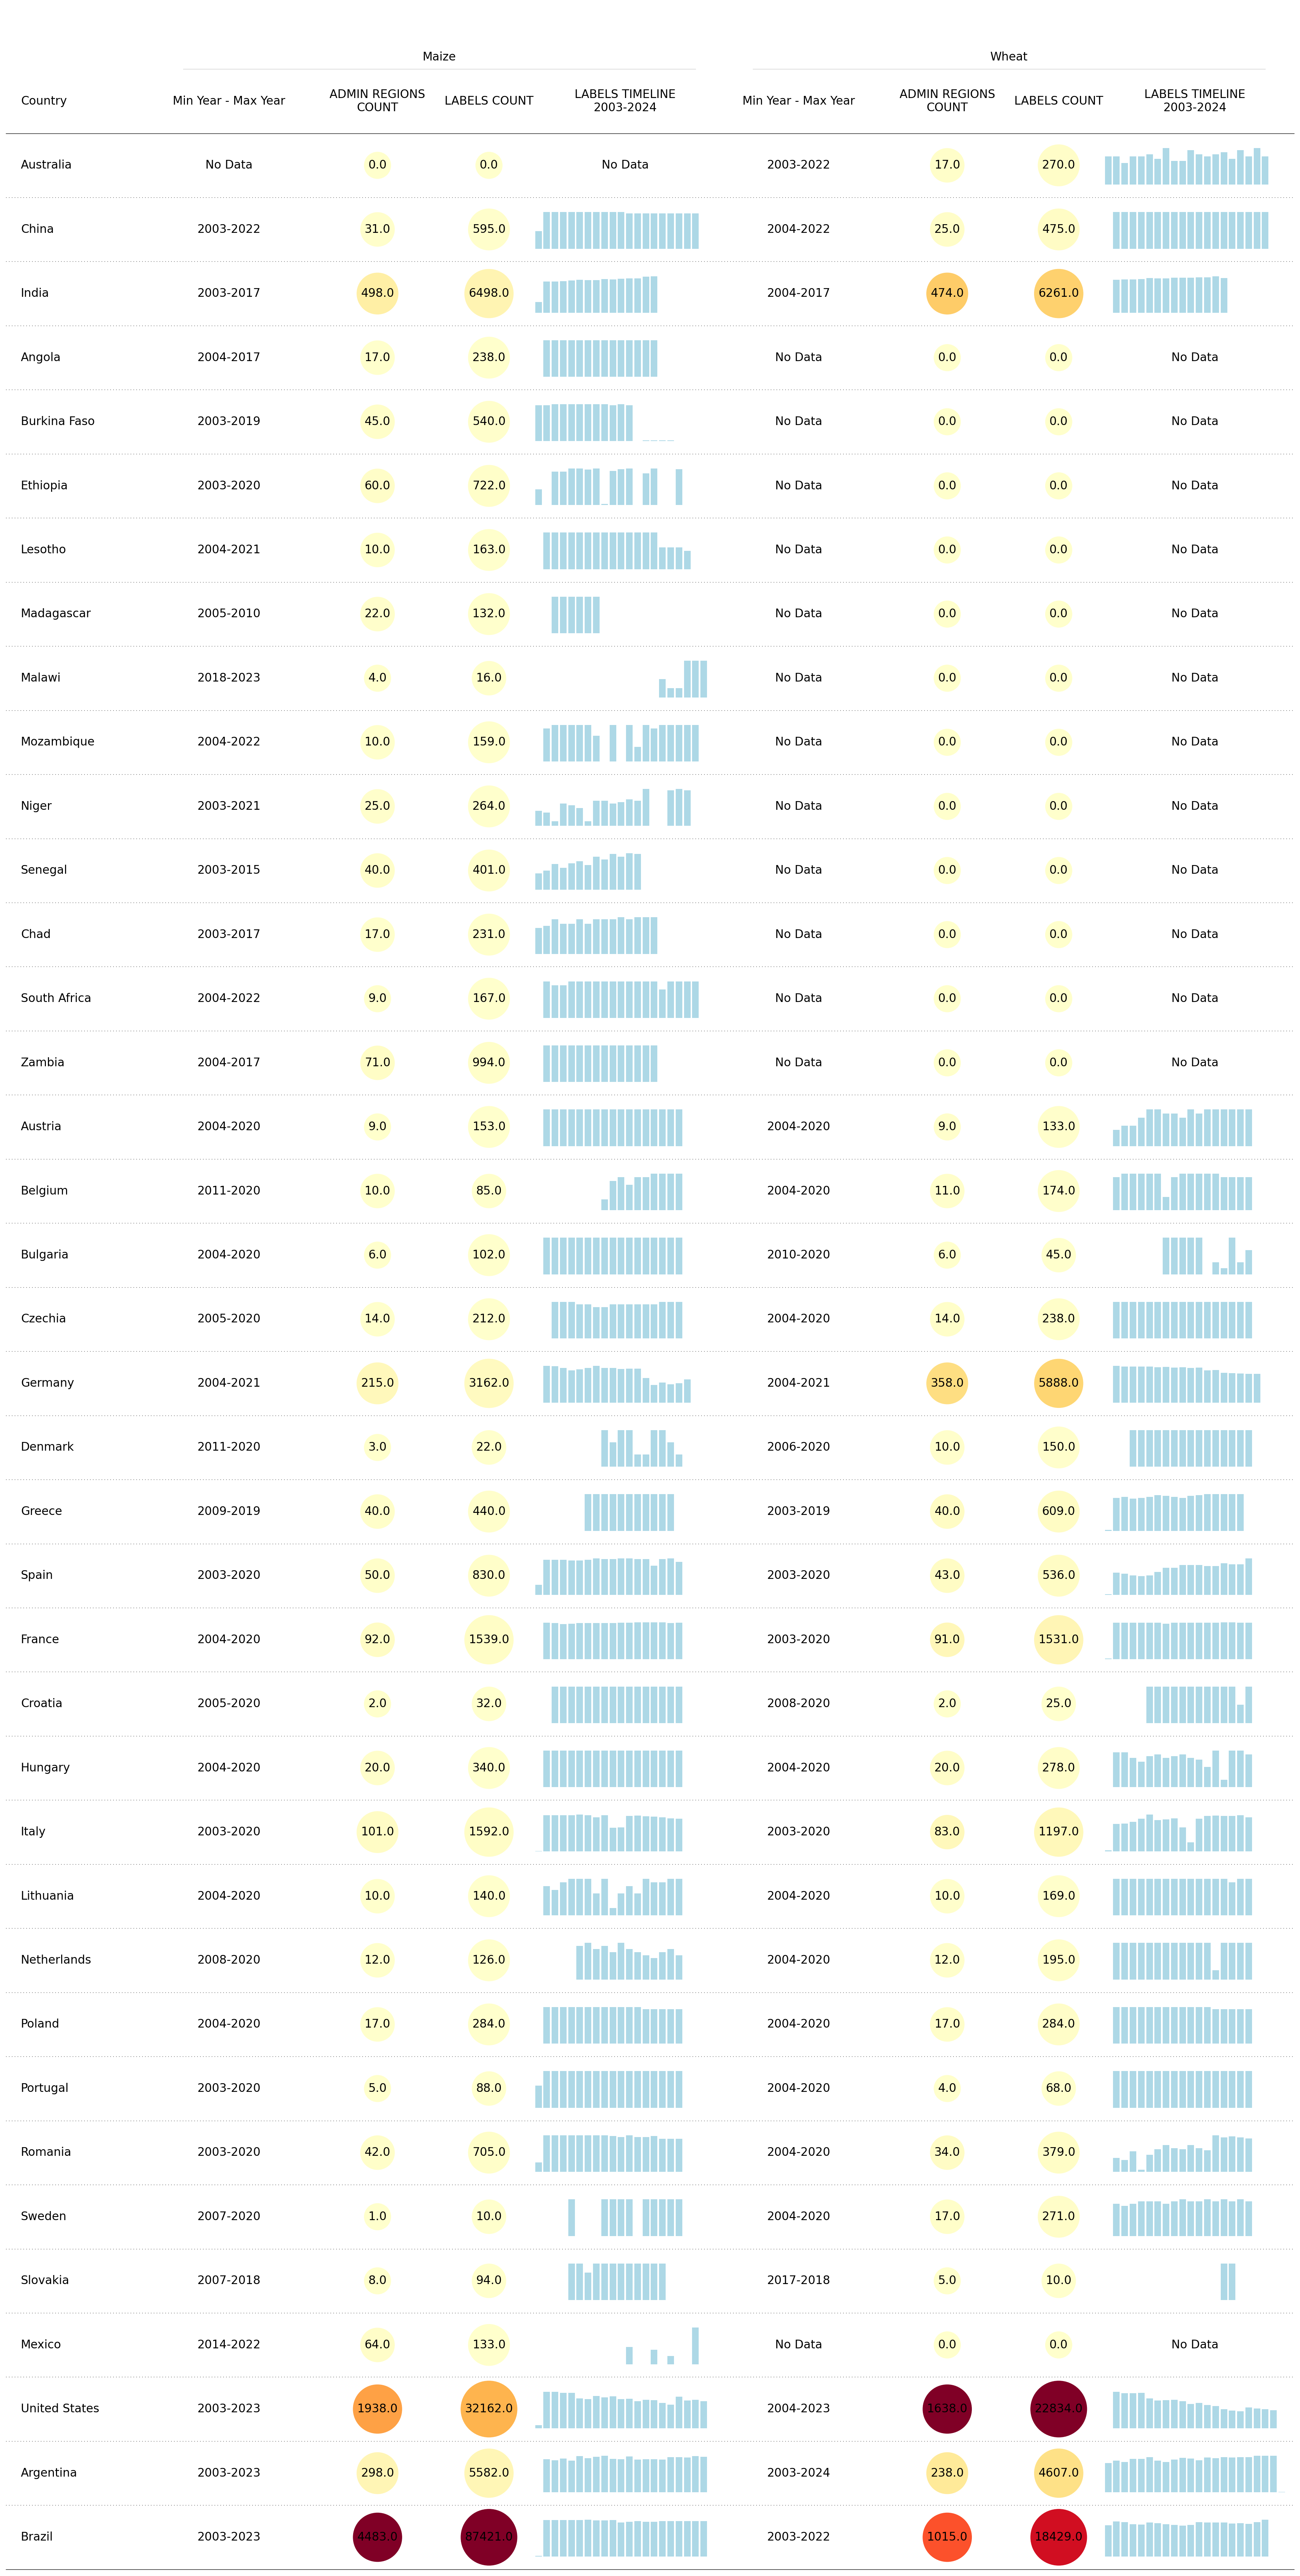

In [7]:
from plottable import ColDef, Table
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut, circled_image

fig, ax = plt.subplots(figsize=(48, 96))

def custom_cmap(s: pd.Series, cmap="YlOrRd"):
  vmin = s.min()
  vmax = s.max()
  norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
  m = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

  return m.to_rgba

maize_label = "Maize"
wheat_label = "Wheat"

tab = Table(
            summary_df,
            columns=["maize_years", "maize_adm_id_count", "maize_labels_count", "maize_labels_count_per_year",
                     "wheat_years", "wheat_adm_id_count", "wheat_labels_count", "wheat_labels_count_per_year"],
            column_definitions=[
                ColDef(name="Country", title ="Country",
                        textprops={"ha": "left"},
                        width=1.5,
                       ),

                # ColDef("flag",title="", width=1,
                #        textprops={"ha": "center"},
                #        plot_fn=circled_image,),
                ColDef(name="maize_adm_id_count",
                       title="ADMIN REGIONS\nCOUNT",
                       width=1.5,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=custom_cmap(summary_df["maize_adm_id_count"]),
                       group=maize_label),

                ColDef(name="maize_labels_count",
                       title="LABELS COUNT",
                       width=0.75,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=custom_cmap(summary_df["maize_labels_count"]),
                       group=maize_label),

                ColDef(name="maize_years",
                       title="Min Year - Max Year",
                       width=1.5,
                       group=maize_label),

                ColDef(name="maize_labels_count_per_year",
                       title="LABELS TIMELINE\n2003-2024", width=2,
                       group= maize_label,
                       plot_fn=densities_plot,
                       textprops={"ha": "center"}),

                ColDef(name="wheat_adm_id_count",
                       title="ADMIN REGIONS\nCOUNT",
                       width=1.5,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=custom_cmap(summary_df["wheat_adm_id_count"]),
                       group=wheat_label),

                ColDef(name="wheat_labels_count",
                       title="LABELS COUNT",
                       width=0.75,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=custom_cmap(summary_df["wheat_labels_count"]),
                       group=wheat_label),

                ColDef(name="wheat_years",
                       title="Min Year - Max Year",
                       width=1.5,
                       group=wheat_label),

                ColDef(name="wheat_labels_count_per_year",
                       title="LABELS TIMELINE\n2003-2024", width=2,
                       group= wheat_label,
                       plot_fn=densities_plot,
                       textprops={"ha": "center"}),
                ],
            row_dividers=True,
            col_label_divider=True,
            footer_divider=True,
            textprops={
                "fontsize": 24,
                "font": "sans serif",
                "ha":"center",
            },
            row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
            col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
            column_border_kw={"linewidth": 1, "linestyle": "-"},
        )

plt.show()